In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(
    name="imdb_reviews",
    split=["train", "test"],
    batch_size=-1, 
    as_supervised=True
)
# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

# print(train_data)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

index=1
print(train_examples[index])
# print(train_labels[index])

# print(train_examples[:3])
# print(train_labels[:3])

b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.'


In [5]:
hub_model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(
    hub_model, 
    output_shape=[20], 
    input_shape=[],
    dtype=tf.string, 
    trainable=True
)

# print(hub_layer(train_examples[:3]))
print(hub_layer(train_examples[:1]))

tf.Tensor(
[[ 1.7657859  -3.882232    3.913424   -1.5557289  -3.3362343  -1.7357956
  -1.9954445   1.298955    5.081597   -1.1041285  -2.0503852  -0.7267516
  -0.6567596   0.24436145 -3.7208388   2.0954835   2.2969332  -2.0689783
  -2.9489715  -1.1315986 ]], shape=(1, 20), dtype=float32)


In [6]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400373 (1.53 MB)
Trainable params: 400373 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
init_weights = model.get_weights()

In [8]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=40,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/40


2025-08-04 21:26:57.722234: I external/local_xla/xla/service/service.cc:168] XLA service 0x7555bdcf6ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-04 21:26:57.722282: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-08-04 21:26:57.722297: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-08-04 21:26:57.743156: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-04 21:26:57.799585: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1754360817.936782    4175 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 [==============================] - 10s 257ms/step - loss: 0.7810 - accuracy: 0.5351 - val_loss: 0.6961 - val_accuracy: 0.5818
Epoch 2/40
30/30 [==============================] - 7s 216ms/step - loss: 0.6544 - accuracy: 0.6239 - val_loss: 0.6252 - val_accuracy: 0.6542
Epoch 3/40
30/30 [==============================] - 7s 237ms/step - loss: 0.5936 - accuracy: 0.6891 - val_loss: 0.5780 - val_accuracy: 0.7066
Epoch 4/40
30/30 [==============================] - 6s 211ms/step - loss: 0.5482 - accuracy: 0.7315 - val_loss: 0.5415 - val_accuracy: 0.7423
Epoch 5/40
30/30 [==============================] - 7s 220ms/step - loss: 0.5082 - accuracy: 0.7676 - val_loss: 0.5074 - val_accuracy: 0.7664
Epoch 6/40
30/30 [==============================] - 6s 194ms/step - loss: 0.4688 - accuracy: 0.7949 - val_loss: 0.4764 - val_accuracy: 0.7865
Epoch 7/40
30/30 [==============================] - 6s 193ms/step - loss: 0.4320 - accuracy: 0.8176 - val_loss: 0.4471 - val_accuracy: 0.8048
Epoch 8/40
30/30

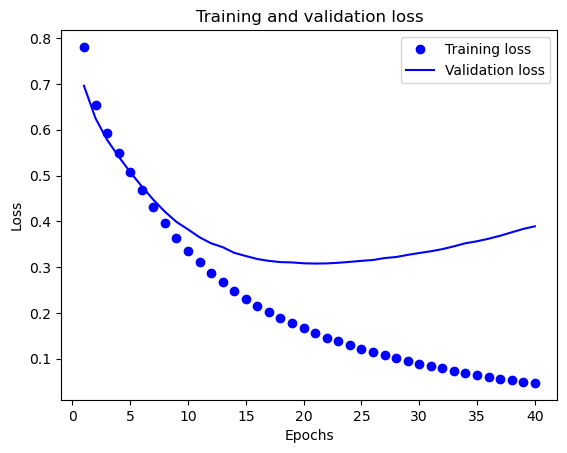

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


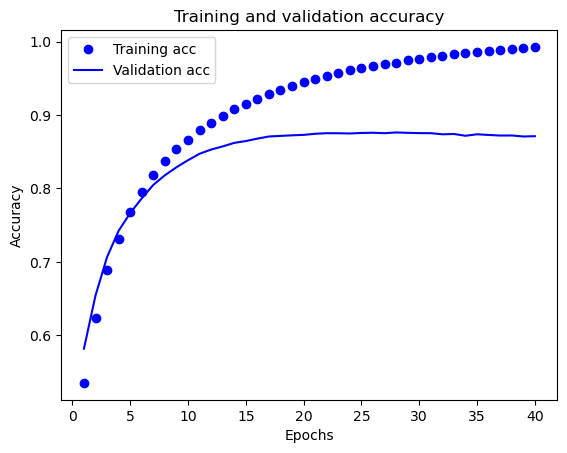

In [11]:
plt.clf()
# clear figure
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()